# Training Classfier from data sets

## Input:  tsv formatted file with at least two classes 0/1.  Here's an example

In [21]:
# Combine two files, 0 and 1 classes into one for training the classifier
filenames = [
    'data/02_training_sheets/test_staff_1.tsv',
    'data/02_training_sheets/test_0.tsv'
]

target_file = 'data/03_final_training_sheets/test_data_staffing.tsv'
with open(target_file, 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)


# widget imports
import ipywidgets as widgets

# View sample data
import pandas as pd
data = pd.read_csv(target_file, delimiter='\t', header=None, encoding='utf-8')
print len(data), "lines found in output file {}".format(target_file)
print data
print "DONE!"

16 lines found in output file data/03_final_training_sheets/test_data_staffing.tsv
                         0                                                  1  \
0               select.com  a leader of the temporary staffing industry| s...   
1           teksystems.com  teksystems services industries it careers cont...   
2                modis.com  modis it engineering staffing tech and enginee...   
3                52ltd.com  tech creative staffing in portland, seattle, s...   
4      wunderlandgroup.com  staffing employment agency recruiters who care...   
5             stafflink.ca  stafflink it staffing company hire it staff in...   
6        bridge-talent.com  bridge technical talent it staffing in rhode i...   
7             edgelink.com  it staffing portland it staffing denver techno...   
8               epitec.com  epitec professional it staffing employment age...   
9            diversant.com  it recruiter it staffing companies diversant n...   
10              hgdata.com

In [2]:
import ipywidgets as widgets
ctl_input_file = widgets.Text(placeholder="Type path to data source path", description="Source File:")
ctl_class_type = widgets.Text(placeholder="svm bayes log_regression", description="Classifier type")
display(ctl_input_file)
display(ctl_class_type)


In [24]:
data_source = ctl_input_file.value
print "File source:", data_source
class_type = ctl_class_type.value
print "Classifier:", class_type

File source: data/03_final_training_sheets/test_data_staffing.tsv
Classifier: bayes


Opening data/03_final_training_sheets/test_data_staffing.tsv for data and loading X,Y classes

Count of classes loaded:
	class 0: 6
	class 1: 9
HERE!_> <type 'numpy.ndarray'>
Training Model ...
Start an iteration
Creating classifier from clf_factory()
Using MultinomialNB classifier
Fitting model to X, y training data, this may take a while...
DONE training, saving model.
Model is saved!
Train Score: 1.0
Test Score: 0.75
Train Error: [0.0]
Test Error: [0.25]
Proba: [[ 0.35337972  0.64662028]
 [ 0.36161451  0.63838549]
 [ 0.30752514  0.69247486]
 [ 0.40705178  0.59294822]]
calling roc_curve
fpr [ 0.  0.  1.] tpr [ 0.33333333  1.          1.        ] roc_thresholds [ 0.69247486  0.63838549  0.59294822]
precision: [ 1.  1.  1.  1.]
recall: [ 1.          0.66666667  0.33333333  0.        ]
.
CALLING PLOT_PR


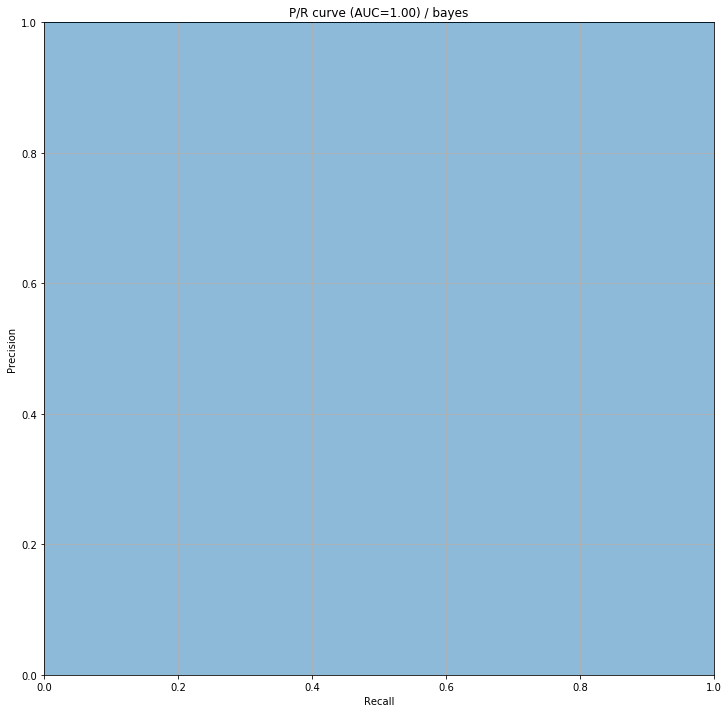

Mean: 0.750	STD: 0.000	MEAN_SCORES	1.000	STD_SCORES:	0.000	
0.0 0.25
CPU times: user 1.05 s, sys: 52.5 ms, total: 1.11 s
Wall time: 1.09 s


In [25]:
%%time
%matplotlib inline
import pandas as pd
import numpy as np
import time

import classification.train_classifier as bc
import classification.utils as utils

## ***** INPUTS ***** 
data_source_file = ctl_input_file.value #'data_for_classification_balanced.tsv'
class_type = ctl_class_type.value
save_path = 'data/04_models'
## **** END INPUTS ****


models = {
    'svm': bc.create_svm_model,
    'bayes': bc.create_ngram_model,
    'log_regression': bc.create_lg_model
}

classifier = models[class_type] 

print "Opening {} for data and loading X,Y classes".format(data_source_file)
data = pd.read_csv(data_source_file, delimiter='\t', encoding='utf-8')

X_orig = data.iloc[:, 1].values
Y_orig = data.iloc[:, 2].values

print "\nCount of classes loaded:"
classes = np.unique(Y_orig)
for c in classes:
    print("\tclass %s: %i" % (c, sum(Y_orig == c)))

pos_neg = np.logical_or(Y_orig == 1, Y_orig == 0)
X = X_orig[pos_neg]
Y = Y_orig[pos_neg]

Y = utils.tweak_labels(Y, [1])

print "Training Model ..."
bc.train_model(classifier, X, Y, save_path, class_type, plot=True)
